# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a narrative visualization with a data set of your choosing**. You can choose any data set you can find on the Internet, or a data set related to your current line of work. 

**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have seen throughout the course.**

Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in this exercise notebook** to create your visualizations, and save them under `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, etc.) by pasting your visualizations and creating all necessary elements (captions, text annotations, layout, etc.) 

4. Save your end product as a **pdf file** and upload it to your exercises folder (**name it L8_Exercise.pdf**)

Make sure that you start with a clear message in mind, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)**. Make sure to have a **clean layout**, and **enough text annotations and captions** to make your message clear. 

You can choose any type of visualization that you believe will be most **effective** for the type of data and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; **make sure to use everything you have learned in this course.** 


Following is to show how to plot to a file to save a graph:

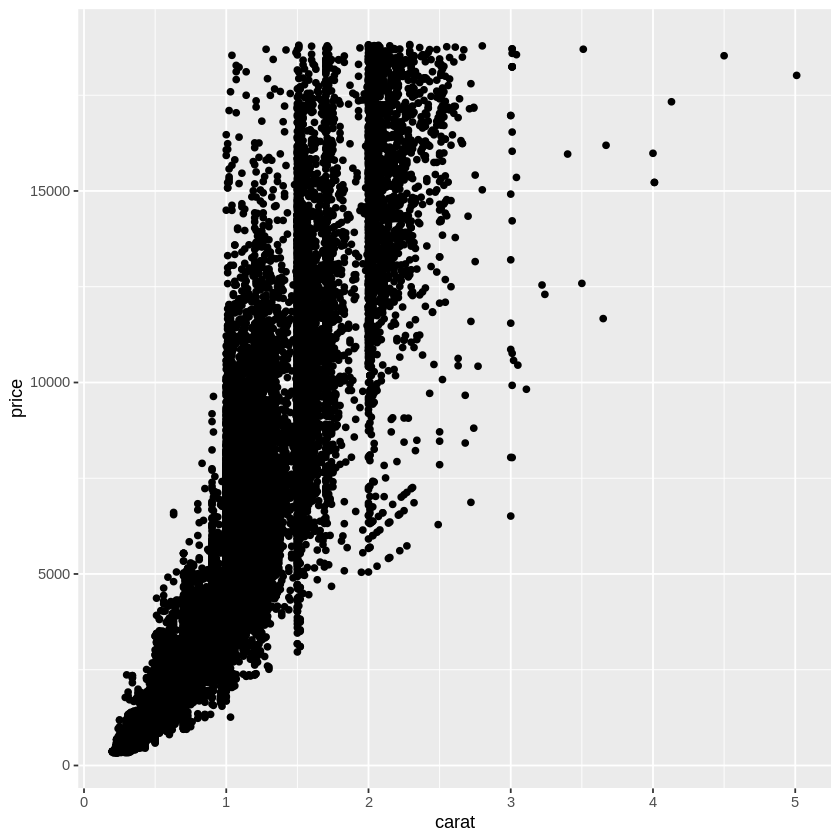

In [1]:
# this is how you save a plot to a file
library(ggplot2)

# comment this out to see the plot in the notebook 
#png(filename="myplot.png")

# your plot here..
qplot(carat, price, data = diamonds)

# comment this out to see the plot in the notebook
#dev.off()

Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

In [70]:
# Read your data here; 
data <- read.csv("Boston_crime.csv")

# Clean it up, reformat it, filter it, sort it, group it, etc.
# I did some of the reformatting in Excel
# I deleted irrelavent rows and columns and changed all related crime categories from names such as shoplifting 
# to broader categories such as theft
# I also sorted alphabetically by offense_code_group
# I had problems with NA values in my plots, so these subsets eliminate that
data=subset(data, !is.na(OFFENSE_CODE_GROUP))
data=subset(data, !is.na(YEAR))
data=subset(data, !is.na(DAY_OF_WEEK))
# I changed the name of the column for convenience when it comes to legend titles
colnames(data)[which(names(data) == "OFFENSE_CODE_GROUP")] <- "Offense"
# This is for making plots with geom_point that aren't crowded by the numerous thefts
# Maps that include thefts are unreadable due to the large number of thefts compared to other crimes
assault_murder_data=subset(data, Offense != "Theft")

# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere
library(ggplot2)
library(ggmap)
library(maps)
library(maptools)
library(sp)

# Read the api key and register it. You have to run this at least once in a notebook 
# to be able to call ggmap functions below. 
apikey <- scan("/dsa/data/all_datasets/ggmap_api_key.txt", what="character")
register_google(key = apikey)

head(data)

INCIDENT_NUMBER,OFFENSE_CODE,Offense,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long
<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>
I140110321-00,402,Assault,ASSAULT & BATTERY D/W - KNIFE,1/24/2016 1:45,2016,1,Sunday,1,42.31841,-71.06829
I152030570-00,403,Assault,ASSAULT & BATTERY D/W - Z Delete,10/29/2016 8:25,2016,10,Saturday,8,42.31721,-71.09880
I140110321-00,403,Assault,ASSAULT & BATTERY D/W - Z Delete,1/24/2016 1:45,2016,1,Sunday,1,42.31841,-71.06829
I130739503-00,403,Assault,ASSAULT & BATTERY D/W - Z Delete,10/16/2015 0:00,2015,10,Friday,0,42.36492,-71.05332
I130626822-00,403,Assault,ASSAULT & BATTERY D/W - Z Delete,10/2/2015 21:00,2015,10,Friday,21,42.31128,-71.08909
I110372326-00,403,Assault,ASSAULT & BATTERY D/W - Z Delete,6/14/2016 9:40,2016,6,Tuesday,9,42.35743,-71.05833


In [71]:
boston <- suppressMessages(get_map("South End, Boston, MA", zoom = 13))

BostonMap <- ggmap(boston, extent = "device", legend = "topleft", darken = c(.2,"white")) # this whitens the map 


In [79]:
# The first plot is a density plot for assaults and murders
# I chose to focus on these two crimes because there were too many thefts for
# the subsequent maps to be effective if they included theft

png(filename="crime_density.png")

BostonMap +

geom_density2d(data = assault_murder_data, aes(x = Long, y = Lat), size = 0.3) + 

stat_density2d(data = assault_murder_data, aes(x = Long, y = Lat, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

scale_fill_gradient("Crime\nDensity",low = "green", high = "red") + 

scale_alpha(range = c(0.1, 0.4), guide = FALSE) +

ggtitle("Assaults and Murders in Boston 6/15/15-9/3/18")

dev.off()

Warning message:
“Removed 8225 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 8225 rows containing non-finite values (stat_density2d).”

png 
  2

In [80]:
# This is the same as above, but faceted by year
# I decided not to use this visualization in the final presentation
# because it didn't add to the message I was trying to convey

png(filename="crime_density_by_year.png")

BostonMap +

geom_density2d(data = assault_murder_data, aes(x = Long, y = Lat), size = 0.3) + 

stat_density2d(data = assault_murder_data, aes(x = Long, y = Lat, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

scale_fill_gradient("Crime\nDensity",low = "green", high = "red") + 

scale_alpha(range = c(0.1, 0.4), guide = FALSE) +

ggtitle("Assaults and\nMurders by Year") +

facet_wrap(~YEAR, ncol=1) +

theme(legend.position = "none")

dev.off()

Warning message:
“Removed 8225 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 8225 rows containing non-finite values (stat_density2d).”

png 
  2

In [81]:
# This visualization is what I consider to be the main one. It shows the locations of every assault and murder

png(filename="crime_points.png")

BostonMap +

geom_point(aes(x = Long, y = Lat, color = Offense, size = Offense, alpha = Offense), data = assault_murder_data) +

scale_color_manual("Offense", values = c("blue","red"), labels = c("Assault","Murder")) +

scale_alpha_discrete(range = c(0.2, 0.8)) +

ggtitle("Murder and Assault Occurences")

dev.off()

Warning message:
“Using alpha for a discrete variable is not advised.”Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“Removed 8225 rows containing missing values (geom_point).”

png 
  2

In [84]:
png(filename="time_of_day_faceted.png")

BostonMap +

geom_point(aes(x = Long, y = Lat, color = Offense, alpha = Offense), data = assault_murder_data) +

scale_color_manual("Offense", values = c("blue","red"), labels = c("Assault","Murder")) +

scale_alpha_discrete(range = c(0.0, 0.8)) +

ggtitle("Murders by Time of Day") +

facet_wrap(~HOUR, ncol=12) +

theme(legend.position = "none")

dev.off()

Warning message:
“Using alpha for a discrete variable is not advised.”Warning message:
“Removed 8225 rows containing missing values (geom_point).”

png 
  2

In [85]:
png(filename="month_faceted.png")

BostonMap +

geom_point(aes(x = Long, y = Lat, color = Offense, alpha = Offense), data = assault_murder_data) +

scale_color_manual("Offense", values = c("blue","red"), labels = c("Assault","Murder")) +

scale_alpha_discrete(range = c(0.0, 0.8)) +

ggtitle("Murders by Month") +

facet_wrap(~MONTH, ncol=12) +

theme(legend.position = "none")

dev.off()

Warning message:
“Using alpha for a discrete variable is not advised.”Warning message:
“Removed 8225 rows containing missing values (geom_point).”

png 
  2

---

# Common Pitfalls / Inefficiencies

**Pay attention to the following in your visualizations and stories:**


### Color coordinate among plots so that the same data attributes have the same color in all plots

you can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value. 


### Perceptual grouping is important! group and/or order values

In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

Pie chart: order wedges. 

In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 


### No lengthy text in x axis

Flip the axes of a bar chart so that string values (text) are readable on the y axis left to right, 

**or** 

at least put them slanted in x axis for better readibility. 


### Plot only those that tell an obvious story

**No crowded** scatter plots with useless linear regression lines that don't tell anything. Look at alternative plots to tell your story.


### If you have too many classes (discrete variables/categories), try to group them 

Instead of giving a color to each of them, you can put them in meaningful groups and color code.

For sequential variables, you can do the same thing by binning. 

Stepped color palettes may be more useful than smooth sequential palettes (especially for comparison in choropleth maps).

You can group/cluster data into meaningful chunks and display those as bubble charts, networks, geographical regions, etc. 

Do NOT dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be perceived immediately. 


### ANNOTATE!

**Tell** your audience what they are supposed to see. 

Use meaningful titles with a message, not dry titles. 

Use nice and concise axis labels. 

Use text annotations (look at the **examples in the lab notebook**).



### THEMING!

**Good looking** charts are more **convincing**. 

**Almost NEVER use the default color palette, default theme, default font.**


Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 



### Use space wisely!

**Balance the plots** to use space effectively.

Pay attention to data-ink ratio.

HAVE A FLOW left to right, top to bottom. 


